# Credit scoring

## 1. Task description

**Task**

Based on the available data on the bank's customers, make a model using a training dataset to predict the non-fulfillment of debt obligations on the current loan. Run a prediction for examples from a test dataset.

**Source of data**

course_project_train.csv - train dataset<br>
course_project_test.csv - test dataset

**Target**

Credit Default - failure to fulfill credit obligations

**Metric**

F1-score (sklearn.metrics.f1_score)

**Data description**

* **Home Ownership** 
* **Annual Income** 
* **Years in current job** 
* **Tax Liens** 
* **Number of Open Accounts** 
* **Years of Credit History** 
* **Maximum Open Credit** 
* **Number of Credit Problems** 
* **Months since last delinquent** 
* **Bankruptcies** 
* **Purpose** 
* **Term** 
* **Current Loan Amount** 
* **Current Credit Balance** 
* **Monthly Debt** 
* **Credit Default** 

## 2. Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
DATASET_PATH = 'course_project_train.csv' # input
PREP_DATASET_PATH = 'course_project_test.csv' # output

## 3. First look at the data

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
df.shape

(7500, 17)

In [5]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [6]:
df.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

## 4. Exploratory Data Analysis

### 4.1. Target

In [8]:
df['Credit Default'].unique()

array([0, 1])

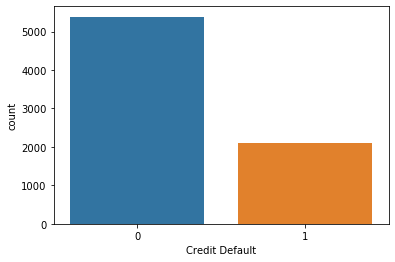

In [9]:
sns.countplot(x='Credit Default',data=df);

_As we can see, non-fulfillment cases less then fullfillment_

### 4.2. Categorical features

#### Home Ownership

In [10]:
df['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

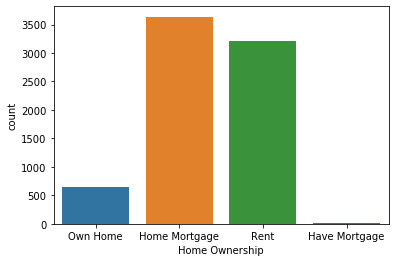

In [11]:
sns.countplot(x='Home Ownership',data=df);

_"Have Mortgage" is the smallest group and looks like a "Home Mortgage", so we can make one group_ 

In [12]:
df.loc[df['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'

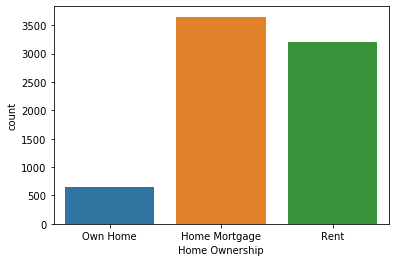

In [13]:
sns.countplot(x='Home Ownership',data=df);

#### Years in current job

In [14]:
df['Years in current job'].isnull().sum(), df['Years in current job'].notnull().sum()

(371, 7129)

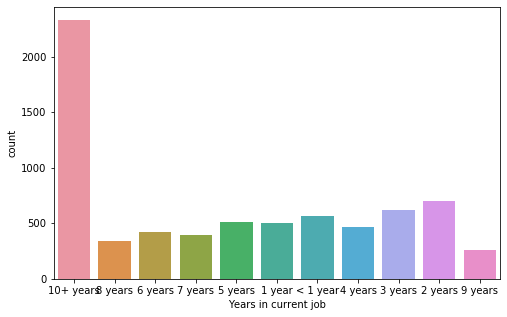

In [15]:
plt.figure(figsize = (8, 5))
sns.countplot(x='Years in current job',data=df);

_looks like a numerical feature, but I don't know what can we do with "10+ years" and "< 1 year" so far..._

#### Purpose

In [16]:
df['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

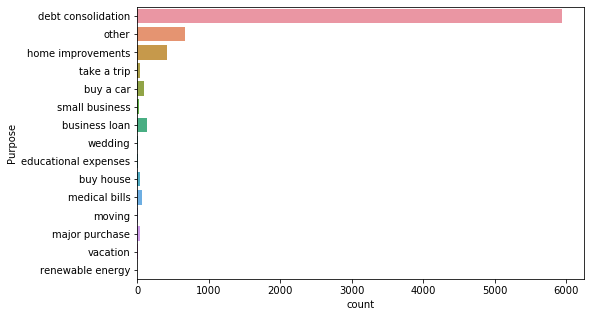

In [17]:
plt.figure(figsize = (8, 5))
sns.countplot(y='Purpose',data=df);

_Maybe it will be a true way to unite several groups, for example, ""vacation" and "take a trip"_

#### Term

In [18]:
df['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

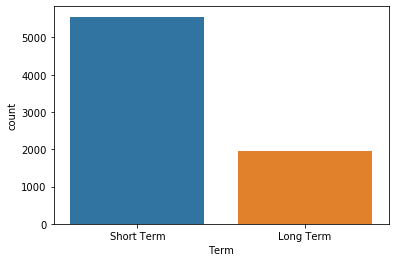

In [19]:
sns.countplot(x='Term',data=df);

### 4.3 Numerical features

In [20]:
df_num_features = df.select_dtypes(include=['float64', 'int'])

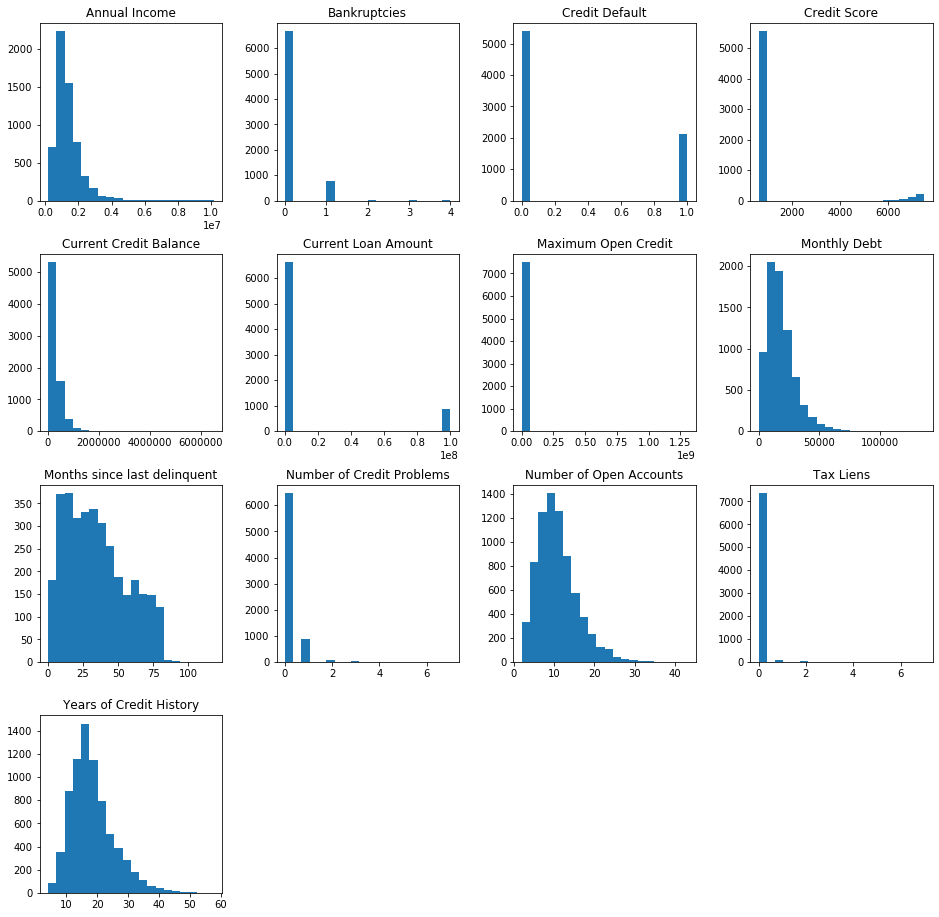

In [21]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

_Features such as "Bankruptcies", "Credit Default", "Credit Score", "Tax Liens", "Months since last delinquent"  have nulls and strange distributions for numerical features, let's take a look at each one in more detail_

#### Bankruptcies, Credit Default

In [22]:
for cat_colname in ['Bankruptcies', 'Credit Default']:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Bankruptcies

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64
****************************************************************************************************

Credit Default

0    5387
1    2113
Name: Credit Default, dtype: int64
****************************************************************************************************



_These features look more like categorical features, we should change a type_

In [23]:
for colname in ['Bankruptcies', 'Credit Default']:
    df[colname] = df[colname].astype(str)

#### Credit Score

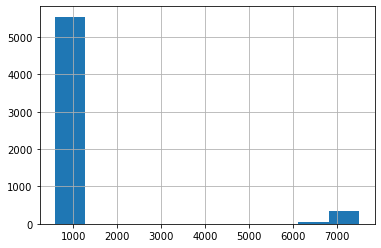

In [24]:
df['Credit Score'].hist();

_As we know from wikipedia, "Credit Score" can take values from 300 to 850, let's look at distributions of values which greater than 850_

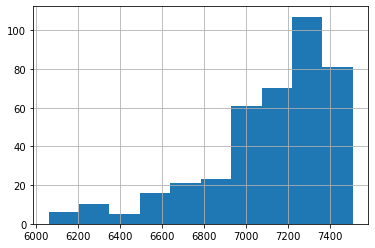

In [25]:
df.loc[df['Credit Score'] > 850, 'Credit Score'].hist();

_It seems that it's a mistake which was made during making the dataset, maybe. So, we just should devide the values by 10_

In [26]:
df.loc[df['Credit Score'] > 850, 'Credit Score'] = df.loc[df['Credit Score'] > 850, 'Credit Score'] / 10

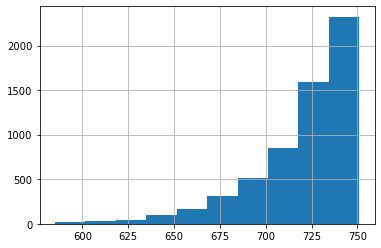

In [27]:
df['Credit Score'].hist();

#### Tax Liens

In [28]:
df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

_The feature looks like a categorical too, however 7366 из 7500 values are 0 and maybe we can delete "Tax Liens" from dataset_

#### Months since last delinquent

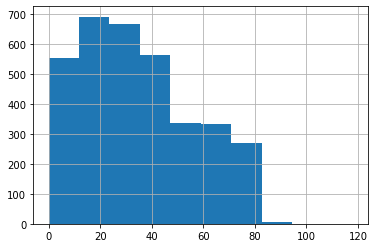

In [29]:
df['Months since last delinquent'].hist();

In [30]:
df['Months since last delinquent'].isnull().sum()

4081

_Most of "Months since last delinquent" data is nulls.. It's a good question what can we do with it..._